In [33]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('clean_terror_data_final.csv')
data.head()

,Date,Day_of_Week,Time,Location,Attack_Type,Perpetrator,Known_Associates,Victims_Injured,Victims_Deceased,Target_Type,...,Claimed_By,Intelligence_Tip,Motive,Operational_Success,Operatives_Captured,Financial_Support,Training_Location,Communication_Method,Major_Incident,country
0,2013-08-26,saturday,5:51,NaN,shooting,group c,1.0,NaN,19.0,civilians,...,unknown,unknown,religious,no,4.0,local,domestic,cellphones,1,turkey
1,2021-05-25,thursday,3:19,nairobi,bombing,group a,6.0,5.0,21.0,tourists,...,group c,no,religious,no,5.0,unknown,abroad,internet,1,kenya
2,1998-12-19,thursday,2:20,lima,hijacking,group c,2.0,49.0,11.0,NaN,...,group d,no,ethnic,no,10.0,local,domestic,NaN,1,peru
3,2001-09-02,wednesday,15:1,tokyo,bombing,group c,9.0,NaN,14.0,civilians,...,group c,unknown,religious,NaN,NaN,local,domestic,cellphones,1,japan
4,2003-08-13,tuesday,18:38,paris,bombing,group c,0.0,27.0,24.0,infrastructure,...,NaN,no,ethnic,NaN,9.0,unknown,domestic,cellphones,1,france


In [3]:
data.tail()

,Date,Day_of_Week,Time,Location,Attack_Type,Perpetrator,Known_Associates,Victims_Injured,Victims_Deceased,Target_Type,...,Claimed_By,Intelligence_Tip,Motive,Operational_Success,Operatives_Captured,Financial_Support,Training_Location,Communication_Method,Major_Incident,country
49995,1981-10-06,monday,8:18,athens,hijacking,group b,NaN,NaN,23.0,police,...,group c,no,unknown,unknown,10.0,international,abroad,cellphones,1,greece
49996,2000-11-14,tuesday,1:5,rio de janeiro,assassination,group b,3.0,5.0,4.0,tourists,...,group a,no,unknown,no,1.0,local,abroad,internet,0,brazil
49997,1993-10-24,thursday,15:13,NaN,arson,group b,7.0,0.0,8.0,civilians,...,unknown,no,religious,unknown,10.0,international,domestic,couriers,0,france
49998,1978-03-09,saturday,22:11,istanbul,bombing,group c,7.0,17.0,10.0,infrastructure,...,group a,NaN,political,NaN,10.0,local,domestic,couriers,1,turkey
49999,2006-05-16,wednesday,20:58,lima,bombing,group c,0.0,38.0,16.0,civilians,...,group c,no,religious,yes,10.0,local,abroad,couriers,1,peru


In [4]:
data.shape

(50000, 21)

In [5]:
data.describe()

,Known_Associates,Victims_Injured,Victims_Deceased,Operatives_Captured,Major_Incident
count,43759.000000,44822.000000,49169.000000,43070.000000,50000.000000
mean,11.089582,21.072353,14.307023,4.991015,0.734420
std,20.305648,17.725143,6.954370,3.171887,0.441646
min,-10.000000,-10.000000,-5.000000,0.000000,0.000000
25%,3.000000,4.000000,10.000000,2.000000,0.000000
50%,6.000000,20.000000,15.000000,5.000000,1.000000
75%,9.000000,37.000000,20.000000,8.000000,1.000000
max,110.000000,60.000000,25.000000,10.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  50000 non-null  object 
 1   Day_of_Week           46005 non-null  object 
 2   Time                  50000 non-null  object 
 3   Location              45972 non-null  object 
 4   Attack_Type           48635 non-null  object 
 5   Perpetrator           50000 non-null  object 
 6   Known_Associates      43759 non-null  float64
 7   Victims_Injured       44822 non-null  float64
 8   Victims_Deceased      49169 non-null  float64
 9   Target_Type           43960 non-null  object 
 10  Weapon_Used           38952 non-null  object 
 11  Claimed_By            44012 non-null  object 
 12  Intelligence_Tip      47557 non-null  object 
 13  Motive                47369 non-null  object 
 14  Operational_Success   33983 non-null  object 
 15  Operatives_Captured

In [7]:
#checking the number of null values in each column
(data.isnull()).sum()

Date                        0
Day_of_Week              3995
Time                        0
Location                 4028
Attack_Type              1365
Perpetrator                 0
Known_Associates         6241
Victims_Injured          5178
Victims_Deceased          831
Target_Type              6040
Weapon_Used             11048
Claimed_By               5988
Intelligence_Tip         2443
Motive                   2631
Operational_Success     16017
Operatives_Captured      6930
Financial_Support        4095
Training_Location        1020
Communication_Method     5997
Major_Incident              0
country                     0
dtype: int64

<AxesSubplot:>

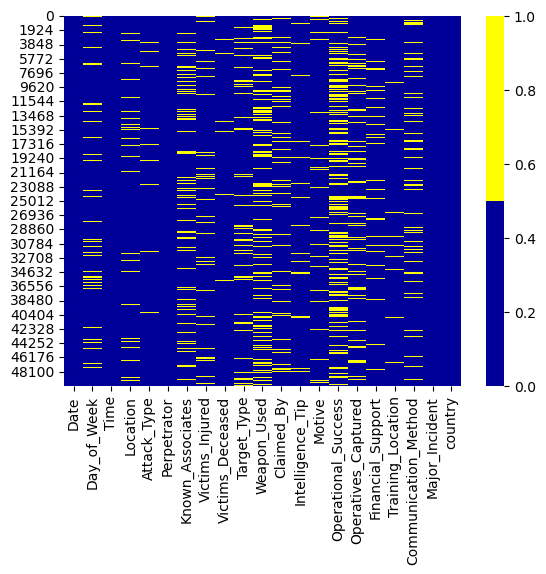

In [8]:

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# missing data heat map
cols = data.columns[:1000] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
import numpy as np
# getting percentage of null values in each column
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Date - 0%
Day_of_Week - 8%
Time - 0%
Location - 8%
Attack_Type - 3%
Perpetrator - 0%
Known_Associates - 12%
Victims_Injured - 10%
Victims_Deceased - 2%
Target_Type - 12%
Weapon_Used - 22%
Claimed_By - 12%
Intelligence_Tip - 5%
Motive - 5%
Operational_Success - 32%
Operatives_Captured - 14%
Financial_Support - 8%
Training_Location - 2%
Communication_Method - 12%
Major_Incident - 0%
country - 0%


In [10]:
import pandas as pd
 
# replacing na values in college with No college
data["Location"].fillna( method ='ffill', limit = 1, inplace = True)
data["Location"].fillna( method ='bfill', limit = 1, inplace = True)

data["Day_of_Week"].fillna( method ='ffill', limit = 2, inplace = True)

data["Attack_Type"].fillna( method ='ffill', limit = 2, inplace = True)

data["Target_Type"].fillna( method ='ffill', limit = 2, inplace = True)

data["Weapon_Used"].fillna( method ='ffill', limit = 2, inplace = True)

data["Claimed_By"].fillna( method ='ffill', limit = 2, inplace = True)

data["Intelligence_Tip"].fillna( method ='ffill', limit = 2, inplace = True)

data["Motive"].fillna( method ='ffill', limit = 2, inplace = True)

data["Operational_Success"].fillna( method ='ffill', limit = 2, inplace = True)

data["Financial_Support"].fillna( method ='ffill', limit = 2, inplace = True)

data["Training_Location"].fillna( method ='ffill', limit = 2, inplace = True)

data["Communication_Method"].fillna( method ='ffill', limit = 2, inplace = True)

data["Known_Associates"].fillna( method ='ffill', limit = 2, inplace = True)

data["Victims_Injured"].fillna( method ='ffill', limit = 2, inplace = True)

data["Victims_Deceased"].fillna( method ='ffill', limit = 2, inplace = True)

data["Operatives_Captured"].fillna( method ='ffill', limit = 2, inplace = True)

data.head()


,Date,Day_of_Week,Time,Location,Attack_Type,Perpetrator,Known_Associates,Victims_Injured,Victims_Deceased,Target_Type,...,Claimed_By,Intelligence_Tip,Motive,Operational_Success,Operatives_Captured,Financial_Support,Training_Location,Communication_Method,Major_Incident,country
0,2013-08-26,saturday,5:51,nairobi,shooting,group c,1.0,NaN,19.0,civilians,...,unknown,unknown,religious,no,4.0,local,domestic,cellphones,1,turkey
1,2021-05-25,thursday,3:19,nairobi,bombing,group a,6.0,5.0,21.0,tourists,...,group c,no,religious,no,5.0,unknown,abroad,internet,1,kenya
2,1998-12-19,thursday,2:20,lima,hijacking,group c,2.0,49.0,11.0,tourists,...,group d,no,ethnic,no,10.0,local,domestic,internet,1,peru
3,2001-09-02,wednesday,15:1,tokyo,bombing,group c,9.0,49.0,14.0,civilians,...,group c,unknown,religious,no,10.0,local,domestic,cellphones,1,japan
4,2003-08-13,tuesday,18:38,paris,bombing,group c,0.0,27.0,24.0,infrastructure,...,group c,no,ethnic,no,9.0,unknown,domestic,cellphones,1,france


In [11]:
import numpy as np
# getting percentage of null values in each column
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Date - 0%
Day_of_Week - 0%
Time - 0%
Location - 0%
Attack_Type - 0%
Perpetrator - 0%
Known_Associates - 0%
Victims_Injured - 0%
Victims_Deceased - 0%
Target_Type - 0%
Weapon_Used - 1%
Claimed_By - 0%
Intelligence_Tip - 0%
Motive - 0%
Operational_Success - 3%
Operatives_Captured - 0%
Financial_Support - 0%
Training_Location - 0%
Communication_Method - 0%
Major_Incident - 0%
country - 0%


In [12]:
# Replace negative values with their absolute values
data['Victims_Injured'] = data['Victims_Injured'].abs()
data['Victims_Deceased'] = data['Victims_Deceased'].abs()
data['Known_Associates'] = data['Known_Associates'].abs()
print(data)

             Date Day_of_Week   Time        Location    Attack_Type  \
0      2013-08-26    saturday   5:51         nairobi       shooting   
1      2021-05-25    thursday   3:19         nairobi        bombing   
2      1998-12-19    thursday   2:20            lima      hijacking   
3      2001-09-02   wednesday   15:1           tokyo        bombing   
4      2003-08-13     tuesday  18:38           paris        bombing   
...           ...         ...    ...             ...            ...   
49995  1981-10-06      monday   8:18          athens      hijacking   
49996  2000-11-14     tuesday    1:5  rio de janeiro  assassination   
49997  1993-10-24    thursday  15:13  rio de janeiro          arson   
49998  1978-03-09    saturday  22:11        istanbul        bombing   
49999  2006-05-16   wednesday  20:58            lima        bombing   

      Perpetrator  Known_Associates  Victims_Injured  Victims_Deceased  \
0         group c               1.0              NaN              19.0   

In [13]:
# counting the negative values in the column
number_of_negative_values = data['Victims_Injured'].apply(lambda x: x < 0).sum()
print('Victims_Injured', number_of_negative_values)

number_of_negative_values1 = data['Victims_Deceased'].apply(lambda x: x < 0).sum()
print('Victims_Deceased', number_of_negative_values1)

number_of_negative_values1 = data['Known_Associates'].apply(lambda x: x < 0).sum()
print('Known_Associates', number_of_negative_values1)

Victims_Injured 0
Victims_Deceased 0
Known_Associates 0


In [14]:
# Handle missing values (NaN) by filling them with a specific value
data['Victims_Injured'].fillna(0, inplace=True)

# Handle infinity values (inf) by replacing them with a specific value
data['Victims_Injured'].replace([np.inf, -np.inf], 999, inplace=True)

# Convert the column to integers
data['Victims_Injured'] = data['Victims_Injured'].astype(int)

data['Known_Associates'].fillna(0, inplace=True)

# Handle infinity values (inf) by replacing them with a specific value
data['Known_Associates'].replace([np.inf, -np.inf], 999, inplace=True)

# Convert the column to integers
data['Known_Associates'] = data['Known_Associates'].astype(int)

# Print the modified DataFrame
print(data)

             Date Day_of_Week   Time        Location    Attack_Type  \
0      2013-08-26    saturday   5:51         nairobi       shooting   
1      2021-05-25    thursday   3:19         nairobi        bombing   
2      1998-12-19    thursday   2:20            lima      hijacking   
3      2001-09-02   wednesday   15:1           tokyo        bombing   
4      2003-08-13     tuesday  18:38           paris        bombing   
...           ...         ...    ...             ...            ...   
49995  1981-10-06      monday   8:18          athens      hijacking   
49996  2000-11-14     tuesday    1:5  rio de janeiro  assassination   
49997  1993-10-24    thursday  15:13  rio de janeiro          arson   
49998  1978-03-09    saturday  22:11        istanbul        bombing   
49999  2006-05-16   wednesday  20:58            lima        bombing   

      Perpetrator  Known_Associates  Victims_Injured  Victims_Deceased  \
0         group c                 1                0              19.0   

In [34]:
# Datatype conversion, from float to integer
data['Victims_Injured']=data['Victims_Injured'].astype('int64')
data['Victims_Deceased']=data['Victims_Deceased'].astype('int64')
data['Major_Incident']=data['Major_Incident'].astype('int64')
data['Known_Associates']=data['Known_Associates'].astype('int64')

In [35]:
data.dtypes

Date                     object
Day_of_Week              object
Time                     object
Location                 object
Attack_Type              object
Perpetrator              object
Known_Associates          int64
Victims_Injured           int64
Victims_Deceased          int64
Target_Type              object
Weapon_Used              object
Claimed_By               object
Intelligence_Tip         object
Motive                   object
Operational_Success      object
Operatives_Captured     float64
Financial_Support        object
Training_Location        object
Communication_Method     object
Major_Incident            int64
country                  object
EncodedString             int64
dtype: object

#### Data Visualization

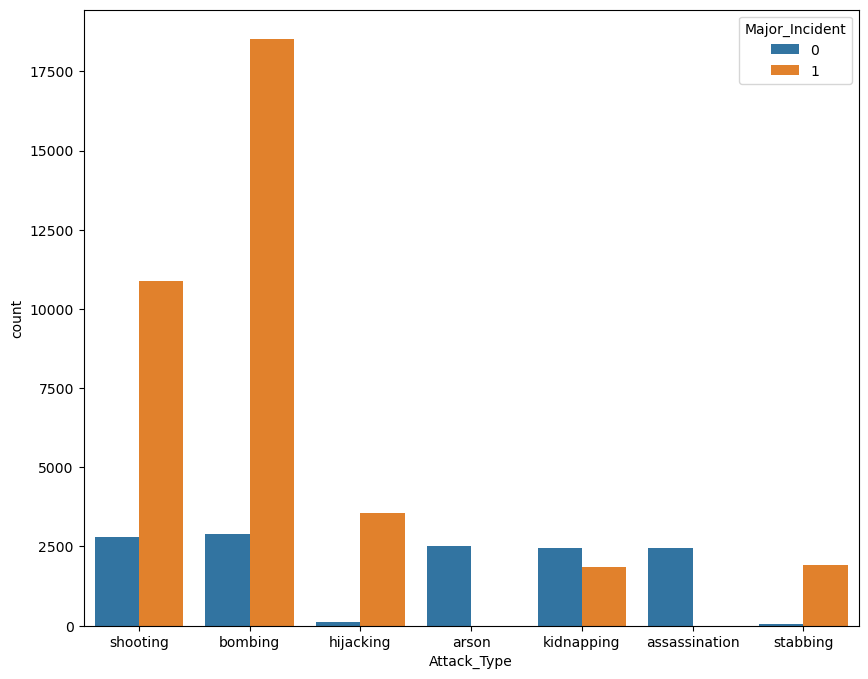

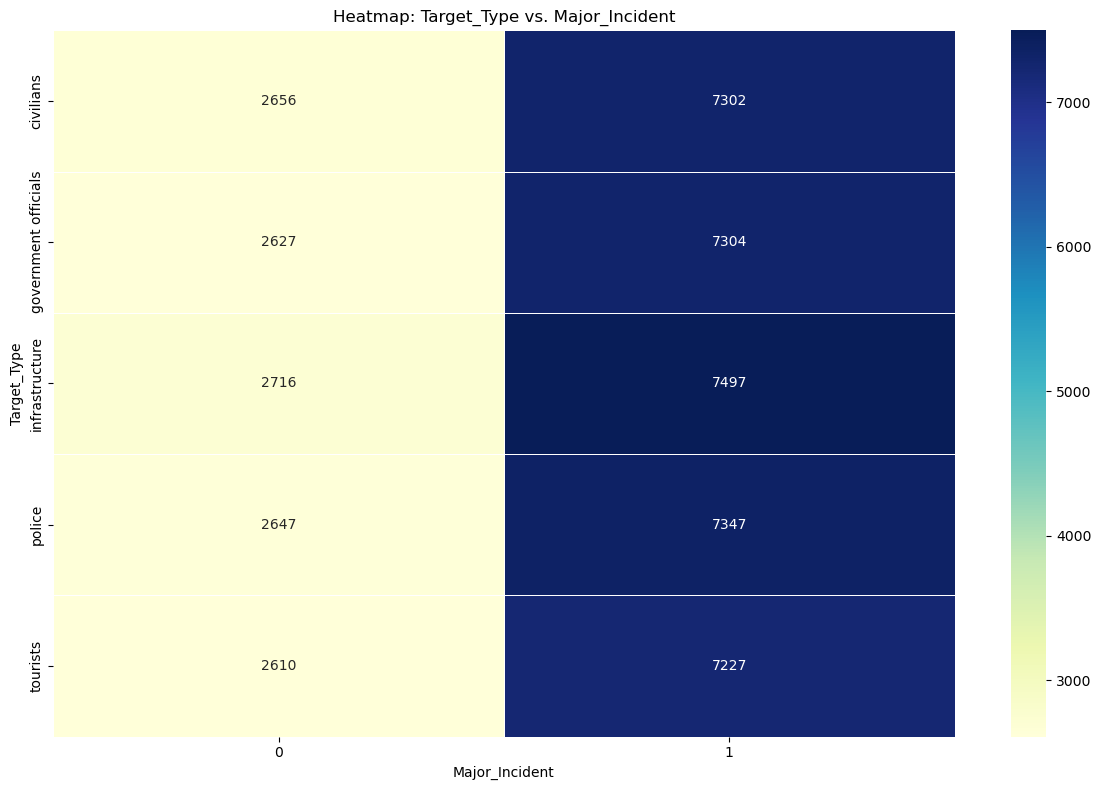

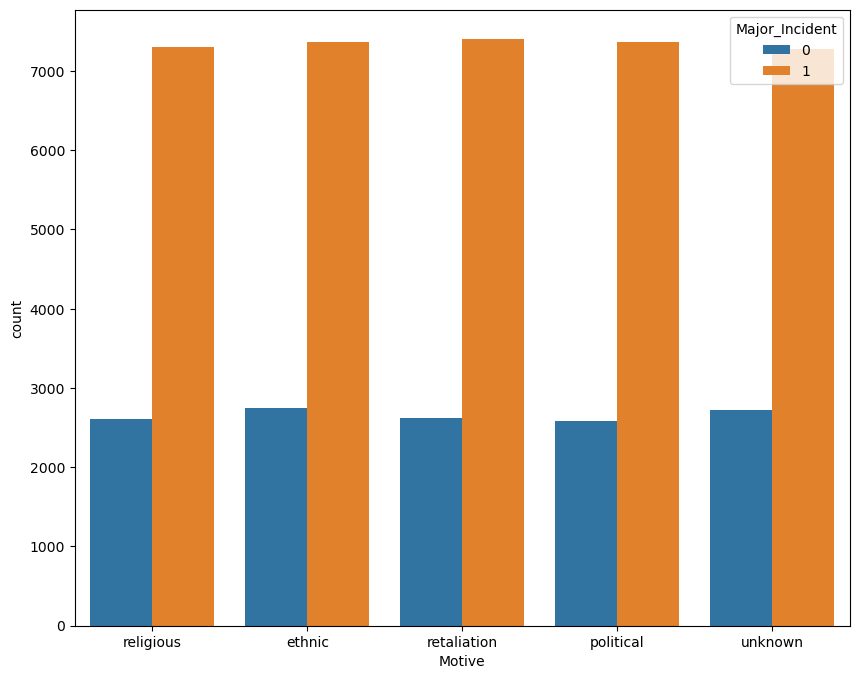

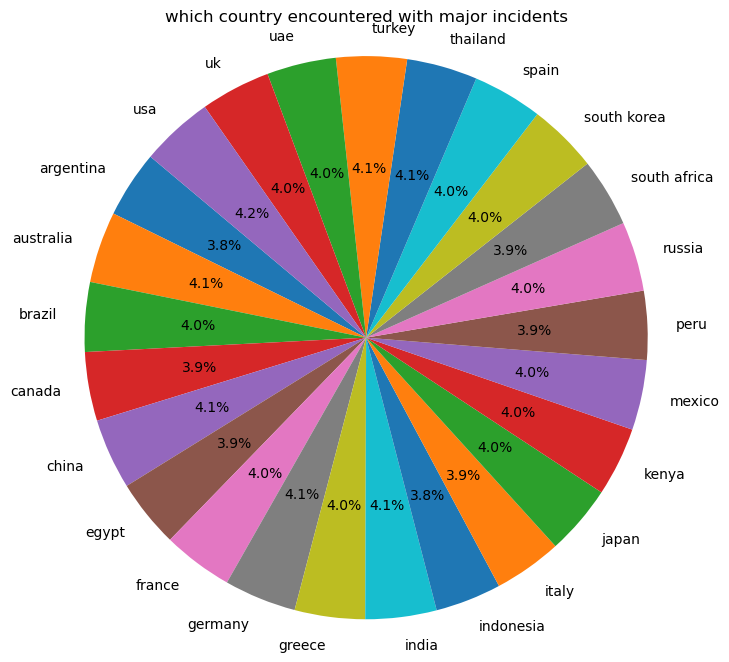

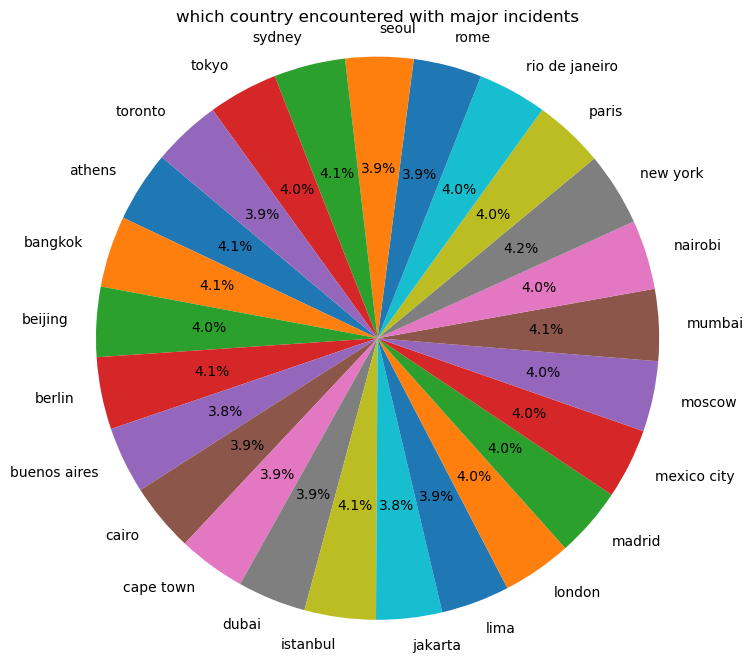

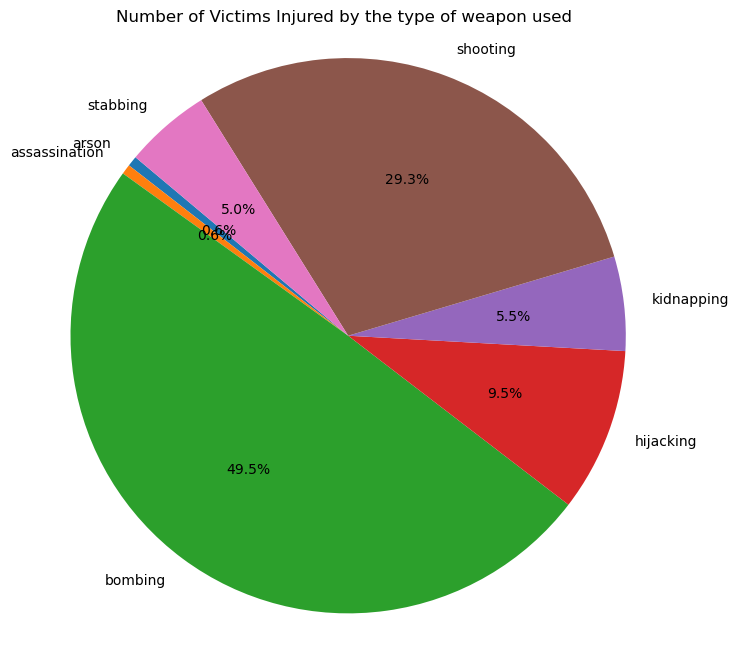

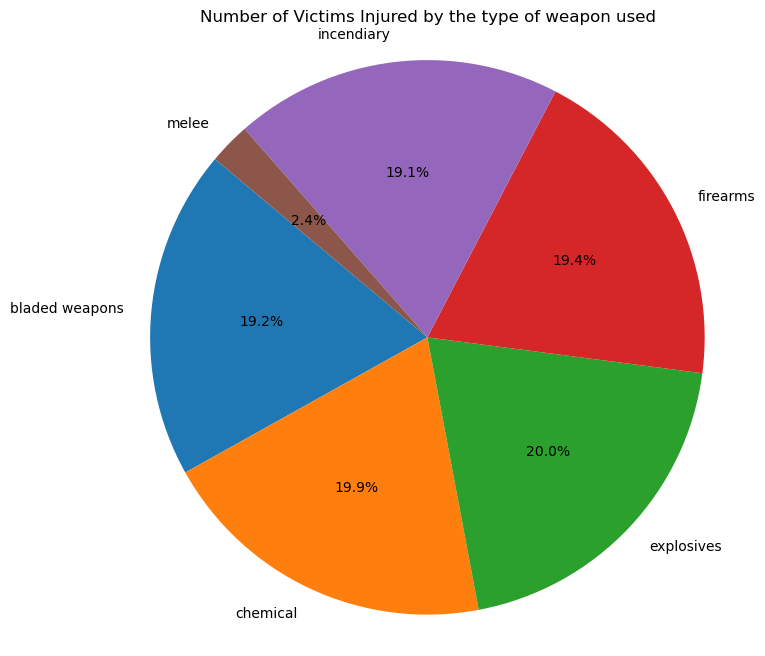

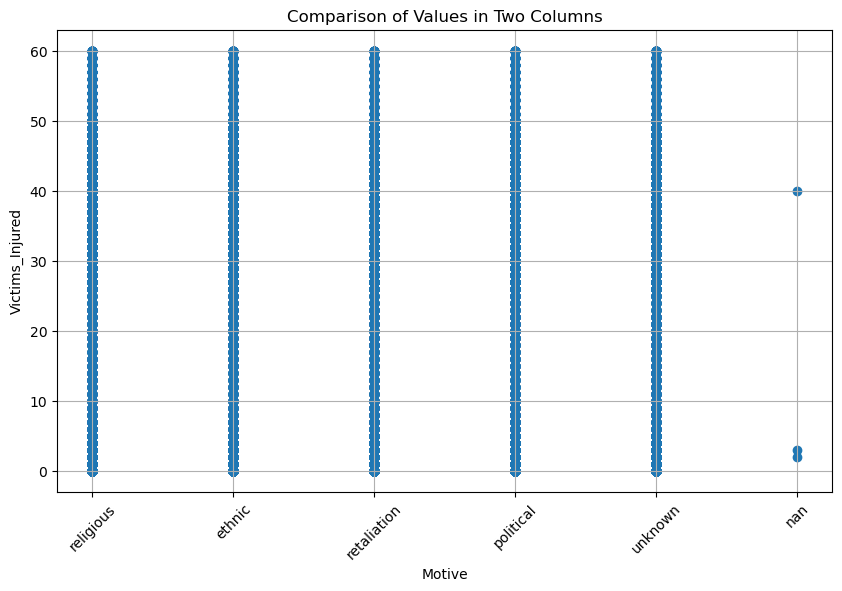

In [36]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# Checking major and minor incidents with the type of Attack
plt.figure(figsize=(10,8))
sns.countplot(x = data['Attack_Type'],hue= data['Major_Incident'])
plt.show()

# Create a pivot table to prepare data for the heatmap
pivot_table = data.pivot_table(index='Target_Type', columns='Major_Incident', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Heatmap: Target_Type vs. Major_Incident")
plt.xlabel("Major_Incident")
plt.ylabel("Target_Type")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(x = data['Motive'],hue= data['Major_Incident'])
plt.show()


# Choose the columns for comparison
string_column = 'country'  
numerical_column = 'Major_Incident'  
# Group the data by the string column and sum the numerical column
grouped_data = data.groupby(string_column)[numerical_column].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))  
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('which country encountered with major incidents')
plt.axis('equal')  
plt.show()


# Choose the columns for comparison
string_column = 'Location'  
numerical_column = 'Major_Incident'  
# Group the data by the string column and sum the numerical column
grouped_data = data.groupby(string_column)[numerical_column].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))  
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('which country encountered with major incidents')
plt.axis('equal')  
plt.show()

# Choose the columns for comparison
string_column = 'Attack_Type'  
numerical_column = 'Victims_Injured'  
# Group the data by the string column and sum the numerical column
grouped_data = data.groupby(string_column)[numerical_column].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))  
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Victims Injured by the type of weapon used')
plt.axis('equal')  
plt.show()

# Choose the columns for comparison
string_column = 'Weapon_Used'  
numerical_column = 'Victims_Injured'  
# Group the data by the string column and sum the numerical column
grouped_data = data.groupby(string_column)[numerical_column].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))  
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Victims Injured by the type of weapon used')
plt.axis('equal')  
plt.show()

# Choose the columns for comparison
string_column = 'Motive'  
numerical_column = 'Victims_Injured'  

# Create a mapping of unique string values to numerical values
string_to_numeric = {string: index for index, string in enumerate(data[string_column].unique())}

# Encode the string values numerically
data['EncodedString'] = data[string_column].map(string_to_numeric)

# Create a scatter plot
plt.figure(figsize=(10, 6))  
plt.scatter(data['EncodedString'], data[numerical_column])
plt.xticks(ticks=list(string_to_numeric.values()), labels=list(string_to_numeric.keys()), rotation=45)
plt.xlabel(string_column)
plt.ylabel(numerical_column)
plt.title('Comparison of Values in Two Columns')
plt.grid(True)

plt.show()




In [18]:
data.columns

Index(['Date', 'Day_of_Week', 'Time', 'Location', 'Attack_Type', 'Perpetrator',
       'Known_Associates', 'Victims_Injured', 'Victims_Deceased',
       'Target_Type', 'Weapon_Used', 'Claimed_By', 'Intelligence_Tip',
       'Motive', 'Operational_Success', 'Operatives_Captured',
       'Financial_Support', 'Training_Location', 'Communication_Method',
       'Major_Incident', 'country', 'EncodedString'],
      dtype='object')

In [19]:
data_categorical = data[['Day_of_Week', 'Time', 'Location', 'Attack_Type', 'Perpetrator', 'Target_Type', 'Weapon_Used', 'Claimed_By', 'Intelligence_Tip', 'Motive', 'Operational_Success', 'Financial_Support', 'Training_Location', 'Communication_Method', 'Major_Incident', 'country']]

In [20]:
for column in data_categorical.columns:
	print(f'{column}-->{type(data_categorical[column][0])}')

Day_of_Week--><class 'str'>
Time--><class 'str'>
Location--><class 'str'>
Attack_Type--><class 'str'>
Perpetrator--><class 'str'>
Target_Type--><class 'str'>
Weapon_Used--><class 'str'>
Claimed_By--><class 'str'>
Intelligence_Tip--><class 'str'>
Motive--><class 'str'>
Operational_Success--><class 'str'>
Financial_Support--><class 'str'>
Training_Location--><class 'str'>
Communication_Method--><class 'str'>
Major_Incident--><class 'numpy.int64'>
country--><class 'str'>


In [21]:
from sklearn.metrics import mutual_info_score
data_categorical_clean = data_categorical.dropna()

for feature in data_categorical_clean.columns:
	if feature != 'Major_Incident':
		mi = mutual_info_score(data_categorical_clean[feature], data_categorical_clean['Major_Incident'])

		print(f"Mutual Information between feature {feature} and target: {mi} \n")

Mutual Information between feature Day_of_Week and target: 3.5404572494721065e-05 

Mutual Information between feature Time and target: 0.015000574237872212 

Mutual Information between feature Location and target: 0.00039926764018608646 

Mutual Information between feature Attack_Type and target: 0.1961403372182684 

Mutual Information between feature Perpetrator and target: 0.17306427416099524 

Mutual Information between feature Target_Type and target: 5.860017856684774e-06 

Mutual Information between feature Weapon_Used and target: 0.11663890458173835 

Mutual Information between feature Claimed_By and target: 0.0003362433107255572 

Mutual Information between feature Intelligence_Tip and target: 9.339272614650174e-06 

Mutual Information between feature Motive and target: 6.29806295234514e-05 

Mutual Information between feature Operational_Success and target: 7.764075363903e-06 

Mutual Information between feature Financial_Support and target: 8.276325076050917e-06 

Mutual Info

##### from the above information we can say that Location, Attack_Type, Perpetrator, Weapon_Used, Claimed_By, country and Time has correlation with the Target column

In [22]:
import scipy.stats as stats
for feature in data_categorical.columns:
    if feature != 'Major_Incident':
        contingency_table = pd.crosstab(data_categorical[feature], data_categorical['Major_Incident'])
        chi2, _, _, _ = stats.chi2_contingency(contingency_table)
        print(f"chi2 = {chi2}")
        n = np.sum(contingency_table)
        m=min(contingency_table.shape)-1
        v = chi2 / (n * m)
        cramers_V = np.sqrt(v)
        print(f" For feature {str(feature)} 'Cramers_V score' with target variables are \n {cramers_V} \n")

chi2 = 2.29220887995538
 For feature Day_of_Week 'Cramers_V score' with target variables are 
 Major_Incident
0    0.013141
1    0.007903
dtype: float64 

chi2 = 1380.7135084379875
 For feature Time 'Cramers_V score' with target variables are 
 Major_Incident
0    0.322455
1    0.193907
dtype: float64 

chi2 = 36.798248103988016
 For feature Location 'Cramers_V score' with target variables are 
 Major_Incident
0    0.052660
1    0.031661
dtype: float64 

chi2 = 19490.8040860622
 For feature Attack_Type 'Cramers_V score' with target variables are 
 Major_Incident
0    1.211570
1    0.728547
dtype: float64 

chi2 = 16475.47984541915
 For feature Perpetrator 'Cramers_V score' with target variables are 
 Major_Incident
0    1.113875
1    0.669826
dtype: float64 

chi2 = 0.15682653100124527
 For feature Target_Type 'Cramers_V score' with target variables are 
 Major_Incident
0    0.003440
1    0.002068
dtype: float64 

chi2 = 12537.968112930172
 For feature Weapon_Used 'Cramers_V score' wit

##### from the above information we can conclude that Day_of_Week, Time, Location, Attack_Type, Perpetrator, Weapon_Used, Claimed_By, Motive and Country are corellating with the target column

In [23]:
# Calculate Pearson correlation between 'Target' and all other numeric columns
correlations = data.corr()['Major_Incident']

# Print the correlations
print(correlations)

Known_Associates       0.003352
Victims_Injured        0.639056
Victims_Deceased       0.761762
Operatives_Captured    0.002725
Major_Incident         1.000000
EncodedString         -0.001667
Name: Major_Incident, dtype: float64


##### from the above methods we have proof that only Day_of_Week, Location, Attack_Type, Perpetrator, Weapon_Used, Claimed_By, country,  Motive, Victims_Injured and Victims_Deceased, Financial_Support, Target_Type are corellated with the target column, hence dropping Communication_Method, Training_Location, Intelligence_Tip, Known_Associates, Operatives_Captured, Time

In [24]:
data1 = data.drop(columns = ['Communication_Method', 'Date', 'Time', 'Known_Associates', 'Operatives_Captured', 'Training_Location', 'Intelligence_Tip'])
data1.head()

,Day_of_Week,Location,Attack_Type,Perpetrator,Victims_Injured,Victims_Deceased,Target_Type,Weapon_Used,Claimed_By,Motive,Operational_Success,Financial_Support,Major_Incident,country,EncodedString
0,saturday,nairobi,shooting,group c,0,19,civilians,bladed weapons,unknown,religious,no,local,1,turkey,0
1,thursday,nairobi,bombing,group a,5,21,tourists,chemical,group c,religious,no,unknown,1,kenya,0
2,thursday,lima,hijacking,group c,49,11,tourists,chemical,group d,ethnic,no,local,1,peru,1
3,wednesday,tokyo,bombing,group c,49,14,civilians,explosives,group c,religious,no,local,1,japan,0
4,tuesday,paris,bombing,group c,27,24,infrastructure,firearms,group c,ethnic,no,unknown,1,france,1


In [37]:
# Split the data
X = data1.drop("Major_Incident", axis=1) 
y = data1["Major_Incident"]

In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame called 'data' with your dataset
# And the target column is 'Major_Incident'

# Step 1: Split the data into X (features) and y (target)
X = data1.drop(columns=['Major_Incident'])
y = data1['Major_Incident']

# Step 2: Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Step 3: Fit and transform the encoder on the entire data
X_encoded = encoder.fit_transform(X)

# Step 4: Create a DataFrame from the encoded array
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names(X.columns))
X_encoded_df.head()


,Day_of_Week_monday,Day_of_Week_saturday,Day_of_Week_sunday,Day_of_Week_thursday,Day_of_Week_tuesday,Day_of_Week_wednesday,Day_of_Week_nan,Location_bangkok,Location_beijing,Location_berlin,...,country_thailand,country_turkey,country_uae,country_uk,country_usa,EncodedString_1,EncodedString_2,EncodedString_3,EncodedString_4,EncodedString_5
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
data1.shape

(50000, 15)

#### Model Building

In [39]:
# Split the data
X = X_encoded_df
y = data1["Major_Incident"]  

In [40]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Instantiate the SMOTE algorithm
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# Now, X_resampled and y_resampled contain the balanced dataset.
# You can use these for further analysis or modeling.

Class distribution before SMOTE: Counter({1: 36721, 0: 13279})
Class distribution after SMOTE: Counter({1: 36721, 0: 36721})


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000, 205), (25000, 205), (25000,), (25000,))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6562
           1       0.99      1.00      0.99     18438

    accuracy                           0.99     25000
   macro avg       0.99      0.98      0.99     25000
weighted avg       0.99      0.99      0.99     25000

confusion matrix for logistic regression:
 [[ 6370   192]
 [   68 18370]]


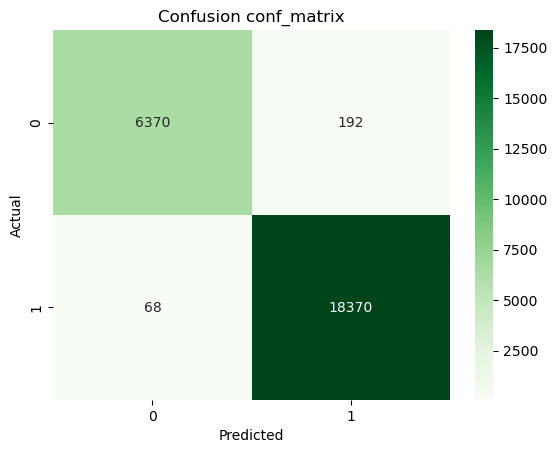

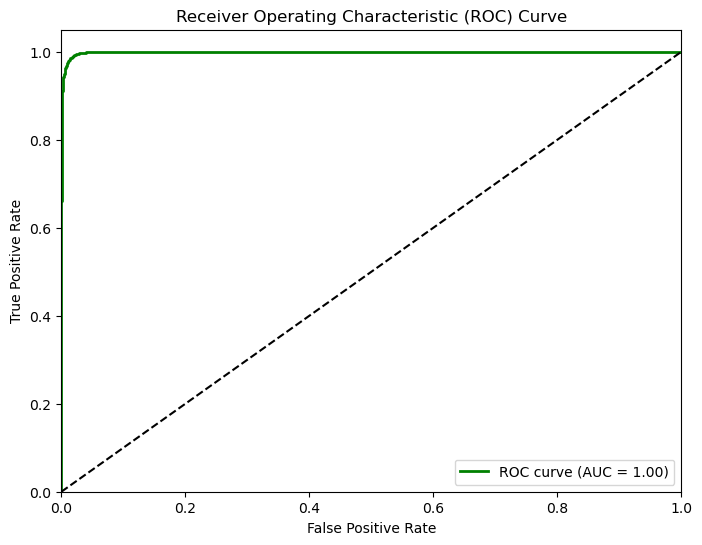

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
# Create model usign Logistic Regression 
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict the job profiles for the test set
ly_pred = logistic_regression.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, ly_pred))

from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, ly_pred)
print('confusion matrix for logistic regression:\n', conf_matrix)
# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion conf_matrix')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

y_proba = logistic_regression.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='Green', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

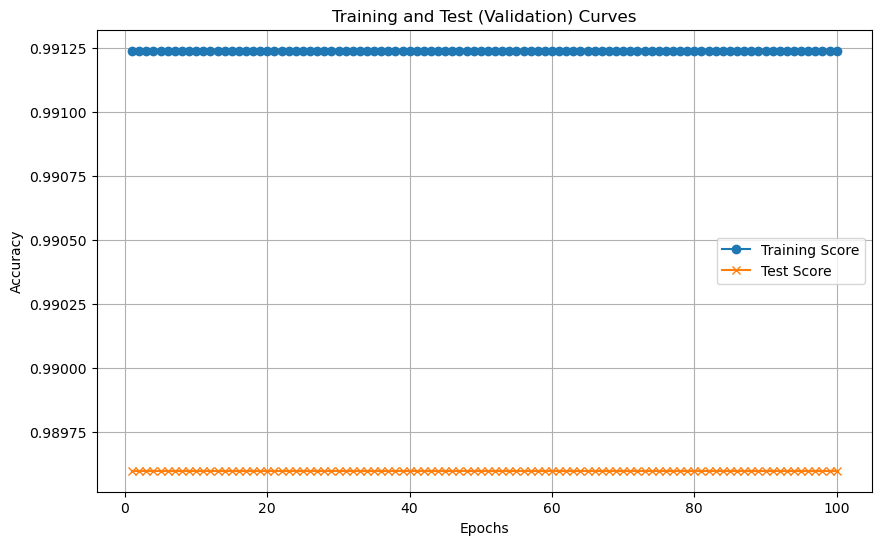

In [44]:
from sklearn.metrics import accuracy_score

# Initialize your machine learning model (replace with your own model)
model = LogisticRegression()

# Lists to store training and test (validation) scores
train_scores = []
test_scores = []

# Training loop (adjust number of epochs as needed)
epochs = 100
for epoch in range(epochs):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training and test (validation) scores (replace with your own metric)
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the training and test (validation) curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_scores, label='Training Score', marker='o')
plt.plot(range(1, epochs+1), test_scores, label='Test Score', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test (Validation) Curves')
plt.legend()
plt.grid(True)
plt.show()

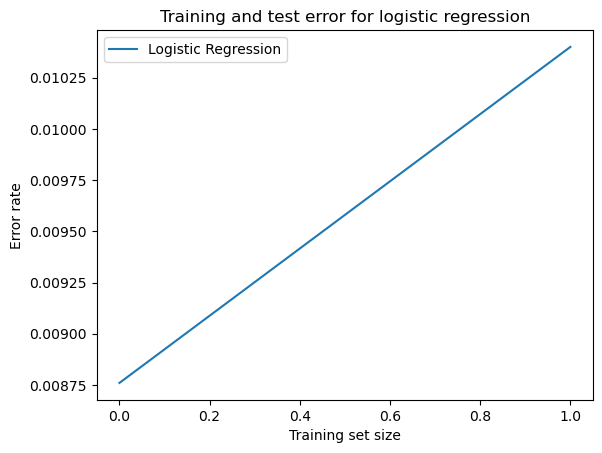

In [45]:
# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the training and test errors
train_error = np.mean(y_train != model.predict(X_train))
test_error = np.mean(y_test != y_pred)

# Plot the training and test errors
plt.plot([0, 1], [train_error, test_error], label='Logistic Regression')
plt.xlabel('Training set size')
plt.ylabel('Error rate')
plt.title('Training and test error for logistic regression')
plt.legend()
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],            # Regularization penalty ('l1' or 'l2')
    'C': [0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solver for optimization
}

# Create the LogisticRegression model
logistic_regression = LogisticRegression()

# Create GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter configuration
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters on the full training set
best_clf = LogisticRegression(**best_params)
best_clf.fit(X_train, y_train)

# Evaluate the final model on the validation set
val_accuracy = best_clf.score(X_val, y_val)

# Evaluate the final model on the test set
test_accuracy = best_clf.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy: 0.9896
Test Accuracy: 0.9929333333333333


In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
ly_pred = model.predict(X_test)
ly_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [49]:
import pickle

In [53]:
pickle_out = open("modellog.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()